# 快速上手使用DeepFlame | 零维、低马赫、高速流求解器

> 作者: 刘圣铭 [liusm@bjaisi.com](mailto:liusm@bjaisi.com)
>
> 创建日期: 2023-06-26
>
> 最后一次修改: 刘圣铭 [liusm@bjaisi.com](mailto:liusm@bjaisi.com)
>
> 最后一次修改时间: 2023-06-26
>
> 描述: 本教程可在 Bohrium Notebook 上直接运行。你可以点击界面上方蓝色按钮**开始连接**，选择 `df-notebook-tutorial:deepflame1.2_cpu` 镜像及至少4核的cpu配置，稍等片刻即可运行。
> 如您遇到任何问题，请联系 [bohrium@dp.tech](mailto:bohrium@dp.tech) 。
>
> 共享协议: 本作品采用[知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议](https://creativecommons.org/licenses/by-nc-sa/4.0/)进行许可。

## 目标

> **上手使用DeepFlame做燃烧反应流体模拟计算**
<p align="center">
    <a href="https://github.com/deepmodeling/deepflame-dev">
        <img src="https://user-images.githubusercontent.com/121787251/218061666-eb9e4188-d368-41d0-8ed6-fe5121699efe.jpg" style="zoom: 40%;">
    </a>
</p>
<p align="center">
    <a href="https://github.com/deepmodeling/deepflame-dev/releases">
        <img src="https://img.shields.io/github/v/release/deepmodeling/deepflame-dev?include_prereleases&label=latest%20release&style=for-the-badge" style="zoom: 80%;">
    </a>    
    <a href="https://github.com/deepmodeling/deepflame-dev/pulls">
        <img src="https://img.shields.io/badge/contributions-welcome-red.svg?style=for-the-badge" style="zoom: 80%;">
    </a>    
    <a href="https://github.com/deepmodeling/deepflame-dev/blob/master/LICENSE">
        <img src="https://img.shields.io/github/license/deepmodeling/deepflame-dev?color=yellow&logo=GitHub&style=for-the-badge" style="zoom: 80%;">
    </a>    
    <a href="https://deepflame.deepmodeling.com/en/latest/">
        <img src="https://img.shields.io/website?label=Documentation%20HomePage&style=for-the-badge&up_message=online&url=https%3A%2F%2Fdeepflame.deepmodeling.com%2Fen%2Flatest%2F" style="zoom: 80%;">
    </a>  
</p>
在学习本教程后，你将能够：

- 安装DeepFlame
- 使用df0DFoam，模拟零维自动点火
- 使用dfLowMachFoam，模拟一维平面火焰
- 使用dfHighSpeedFoam，模拟一维氢气/氧气爆轰

**阅读该教程【最多】约需 15 分钟，让我们开始吧！**

## 目录

* [背景](#background)
* [安装DeepFlame](#1)
    * [安装前提](#1-1)
    * [配置环境](#1-2)
* [零维求解器-零维自动点火](#2)
    * [运行算例](#2-1)
    * [结果分析](#2-2)
* [低马赫求解器-一维平面火焰](#3)
    * [运行算例](#3-1)
    * [结果分析](#3-2)
* [高速流求解器-一维氢气/空气爆轰](#4)
    * [运行算例](#4-1)
    * [结果分析](#4-2)
* [进一步阅读](#furtherreading)

## 背景 <a id ='background'></a>
围绕着「机器学习+物理建模+高性能计算」的核心理念，DeepFlame项目基于OpenFOAM、Cantera、Torch等开源平台，结合异构并行与AI加速器等新一代算力基础设施，旨在建设高精度、高效率、简单易用、覆盖面广的燃烧反应流的数值模拟程序，尝试解决闭源代码权威化、算力资源垄断化、祖传代码老化僵化等问题。同时希望结合开源社区的力量，为广大燃烧模拟用户搭建共享代码、算力平台和算例库，尝试改变研究者无代码可用、论文结果难以复现等诸多困局。

本教程将带你从安装DeepFlame开始，到使用DeepFlame内的求解器模拟经典的燃烧反应流算例，并对结果进行分析。这里我们采用DeepFlame v1.2版本。

## 1. 安装DeepFlame<a id ='1'></a>

### 1.1 安装前提<a id ='1-1'></a>
安装环境为Linux Ubuntu子系统，推荐使用WSL2。请确保在Anaconda官网下载Anaconda3并按照官方教程安装。

需要安装OpenFOAM-7, LibCantera和PyTorch。本教程已经把这些库都在镜像中安装好了，如果在本地运行notebook也许会要手动安装库，请参考下面的命令。

注意，Ubuntu需要使用20.04版本。OpenFOAM-7和ParaView 5.6.0和Ubuntu的最新版不适配。

首先安装OpenFOAM-7：

In [1]:
# ! sudo sh -c "wget -O - https://dl.openfoam.org/gpg.key | apt-key add -"
# ! sudo add-apt-repository http://dl.openfoam.org/ubuntu
# ! sudo apt-get updat
# ! apt-get -y install openfoam7

OpenFOAM-7和ParaView 5.6.0将被安装在/opt目录下。

LibCantera和PyTorch可以通过conda安装。

注意，安装PyTorch时，请在PyTorch官网按照硬件配置获取相对应的安装命令行。为了方便在任意镜像下安装PyTorch，这里使用的是PyTorch的仅CPU工作的安装选项，小伙伴们如果在本地运行可以选择使用GPU的安装命令。运行命令如下：

In [2]:
# ! conda create -n deepflame python=3.8
# ! conda activate deepflame
# ! conda install -c cantera libcantera-devel
# ! conda install pytorch torchvision torchaudio cpuonly -c pytorch
# ! conda install pybind11
# ! conda install -c conda-forge easydict

### 1.2 配置环境<a id ='1-2'></a>

读取执行OpenFOAM-7的环境变量文件：

In [1]:
!/bin/bash -c "source /opt/openfoam7/etc/bashrc"

从github获取DeepFlame库

In [2]:
! cd /root && git clone https://github.com/deepmodeling/deepflame-dev.git

Cloning into 'deepflame-dev'...
remote: Enumerating objects: 9699, done.
remote: Counting objects: 100% (1738/1738), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 9699 (delta 958), reused 1603 (delta 887), pack-reused 7961
Receiving objects: 100% (9699/9699), 181.99 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (5094/5094), done.


配置DeepFlame的环境

In [3]:
! cd /root/deepflame-dev && /bin/bash -c ". configure.sh --use_pytorch"
! /bin/bash -c "source /root/deepflame-dev/bashrc"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range
dirname: missing operand
Try 'dirname --help' for more information.
setup for deepflame bashrc:
LIBCANTERA_DIR=/opt/mamba
PYTORCH_INC=-I/opt/mamba/include/python3.10 -I/opt/mamba/lib/python3.10/site-packages/pybind11/include
PYTORCH_LIB=
LIBTORCH_DIR=
cp: cannot stat '/TurbulenceModels/compressible': No such file or directory
cp: cannot stat '/thermophysicalModels/basic': No such file or directory
cp: cannot stat '/thermophysicalModels/thermophysicalProperties': No such file or directory
cp: cannot stat '/lagrangian/intermediate': No such file or directory
cp: cannot stat '/lagrangian/turbulence': No such file or directory
cp: cannot stat '/regionModels/surfaceFilmModels': No such file or directory
cp: cannot stat '/functionObjects/field': No such file or directory


之后可以安装DeepFLame:

In [38]:
! cd /root/deepflame-dev && /bin/bash -c ". install.sh"

install.sh: line 20: [: =: unary operator expected
install.sh: line 29: ./Allwmake: No such file or directory


如果DeepFlame成功编译，你应该会看到：
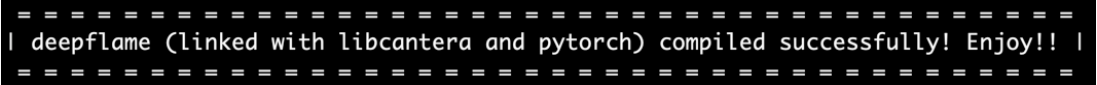

## 2. 零维求解器-零维自动点火<a id ='2'></a>
本算例模拟在恒定压强或恒定体积条件下零维自动点火。这个算例调用了DeepFlame中植入的化学反应源项。

案例条件设置如下：

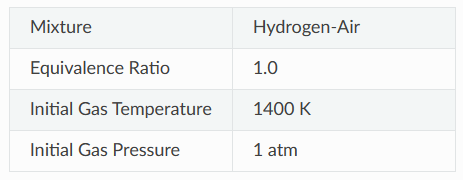

案例的预期结果：

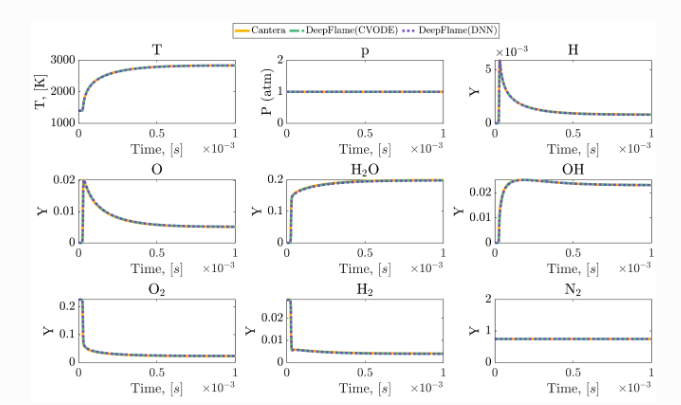

### 2.1 运行算例<a id ='2-1'></a>

读取OpenFOAM配置文件：

In [ ]:
source $HOME/OpenFOAM/OpenFOAM-7/etc/bashrc

读取DeepFlame配置文件：

In [ ]:
source $HOME/deepflame-dev/bashrc

进入零维自动点火算例的目录下：

In [ ]:
cd $HOME/deepflame-dev/examples/df0DFoam/zeroD_cubicReactor/H2/cvodeIntegrator

使用文件内置的脚本运行算例：

In [ ]:
./Allrun

### 2.2 结果分析<a id ='2-2'></a>

后处理需要的探针(probe)数据保存在/systems/probes路径下。在这个案例中，探针位置定义在(0.0025, 0.0025, 0.0025)处，测量温度随时间的变化情况。如果算例运行成功，结果将被保存到/postProcessing/probes/0/T，通过如下命令可以看到结果：

In [ ]:
gnuplot
plot "/your/path/to/postProcessing/probes/0/T"

## 3. 低马赫求解器-一维平面火焰<a id ='3'></a>
本算例进行一维自由传播火焰的稳态模拟。结果可以捕捉火焰厚度，层流火焰速度和一维火焰的具体结构。本算例使用到了DeepFlame中的对流-扩散-反应算法。

案例条件设置如下：

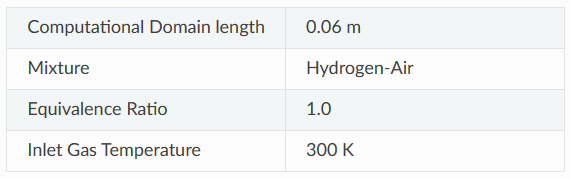

一维平面火焰的示意图以及预期的火焰结构：

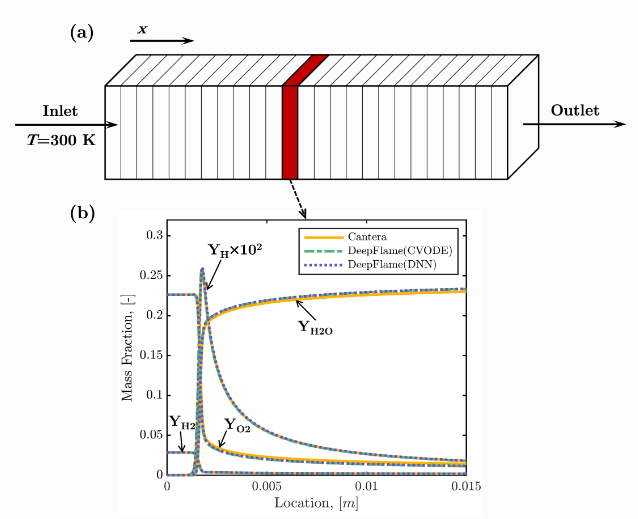

### 3.1 运行算例<a id ='3-1'></a>

### 3.2 结果分析<a id ='3-2'></a>

## 4. 高速流求解器-一维氢气/空气爆轰<a id ='4'></a>
爆轰的传播过程包含了前端激波和自动点火间的复杂交互，体现了激波和化学反应间的耦合作用。本案例将通过DeepFlame准确捕捉此过程，并计算出爆轰的传播速度。

案例条件设置如下：

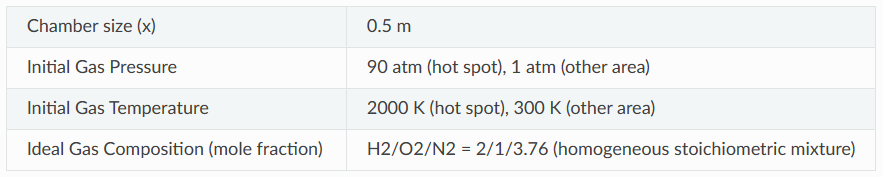

一维爆轰传播算例的预期结果：

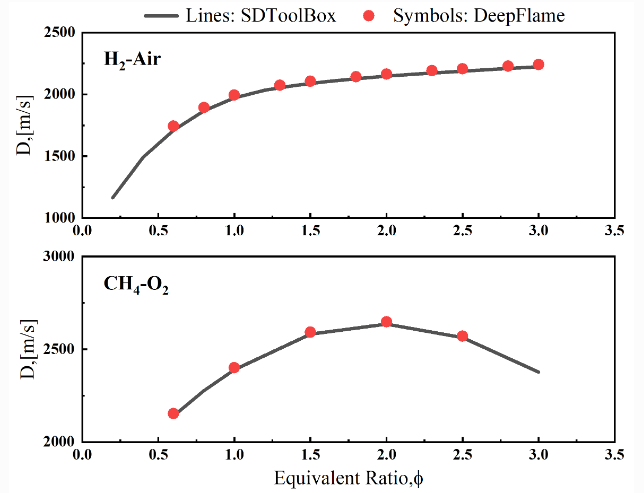

### 4.1 运行算例<a id ='4-1'></a>

### 4.2 结果分析<a id ='4-2'></a>

## 进一步阅读 <a id='furtherreading'></a>

如果您希望更深入学习DeepFlame，本节提供有关该主题的更多资源。

**DeepFlame项目**

- [DeepFlame Homepage](https://deepflame.deepmodeling.com)
- [DeepFlame on Github](https://github.com/deepmodeling/deepflame-dev)
